# *Lecture 7*


# Advanced Monte Carlo Integration Methods and Applications
## (von Neumann Method, Metropolis Algorithm, and Ising Model)

| |
|:---:|
|Selected Content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|
| Additional content from By HeMath [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], from Wikimedia Commons

## Application: "Monte Carlo Simulation" of Spontaneous Radioactive Decay

Spontaneous decay is a natural process in which a particle, with
no external stimulation, decays into other particles. Although
the probability of decay of any one particle in any time interval
is constant, the exact time when a specific particle decays is a random event.
In other words, the probability
$\mathcal{P}(t)$ of any one particle decaying per unit time interval is a
constant, yet when that particle decays it is gone forever. Of
course, as the total number $N(t)$ of particles decreases with time, so does the number that decay per unit time.
Nevertheless, the probability of any one
particle decaying in some time interval remains the same for as long as that particle exists.

$$\begin{align} 
\mathcal{P} & =   \frac{\Delta N(t)/N(t)} {\Delta t}  =  - \lambda\\
 &     \  \frac{\Delta  N(t)}{\Delta t} = -\lambda N(t) \\
 & \Delta  N(t) = -\lambda N(t) \Delta t
\end{align}$$

where the constant $\lambda$ is called the *decay rate* and the minus sign indicates a decreasing number.  Because $N(t)$ decreases in time,  the *activity* 
${\Delta N(t)}/{\Delta t}$ 
(sometimes called decay rate) also decreases with time. 

This *finite-difference equation* for $\Delta N(t)$ relates
the experimental quantities $N(t)$, $\Delta N(t)$, and
$\Delta t$. Although a finite-difference equation cannot be integrated the way a
differential equation can, it can be simulated numerically. Because the
process is random, we cannot predict a single value for $\Delta N(t)$, 
although we can predict the average number of decays when
observations are made of many identical systems of $N$ decaying
particles.

When the number of particles $N\rightarrow \infty$ and the observation time interval $\Delta t \rightarrow 0$, our difference equation becomes a differential equation, and we obtain the familiar exponential decay law:

$$
 \frac{\Delta N(t)}{\Delta t} \longrightarrow \frac{dN(t)}{dt} = - \lambda N(t)
$$
   
This can be integrated to obtain the time dependence of the total
number of particles and of the total activity:

$$\begin{align}
N(t) & =  N(0) e^{-\lambda t} = N(0) e^{-t/\tau}\\
\frac{dN(t)}{dt} & =  -\lambda N(0) e^{-\lambda t}= \frac{dN}{dt}(0)
e^{-\lambda t}
\end{align}$$

In this limit ($N\rightarrow\infty$ and $\Delta t \rightarrow 0$) we can identify the decay rate $\lambda$ with the inverse
lifetime: $\lambda =  1/\tau$.
   
The exponential decay formula is a good
description for a large number of particles where
$\Delta N/N \simeq 0$.  However, in nature  $N(t)$ can be a small number, and in that case we
have a statistical and not a continuous process. 
The exponential decay formula becomes less and less accurate as the number of particles gets smaller and smaller.

### Simulation Implementation

Because each individual decay is inherently random, we throw a random number for each particle (atom) to decide if it decays or not.
The probability for each particle to decay per unit time is $\mathcal{P}$,
so a high $\mathcal{P}$ means a particle is likely to decay.

Note that $\Delta t$ matters!  The probability to decay during a 1-second timestep is not the same as the probability to decay during a 2-second timestep.

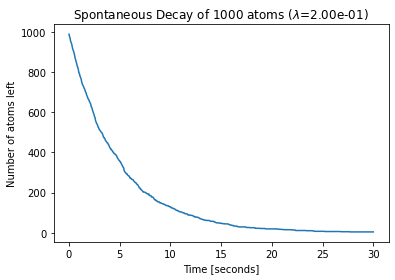

In [4]:
# Particle decay with decay constant lambda1

import numpy as np
import random
import matplotlib.pyplot as plt

seed = 68111                                   
lambda1 = 0.2                                  # Decay constant
max_atoms = 1000
#max_atoms = 100
time_max = 30
nsteps = 1000
number_left = max_atoms                        # Initial value
time_values = np.linspace(0., time_max, nsteps)
time_step = (time_max-0.)/(nsteps-1)
y_values = np.zeros(len(time_values))

time_index = 0
for time in time_values:                       # Time loop
    for atom in range(number_left):            # Decay loop
        decay = random.random()
        if (decay < lambda1*time_step):
            number_left -= 1                   # This atom has decayed
    y_values[time_index] = number_left
    time_values[time_index] = time
    time_index += 1

plt.plot(time_values,y_values)    
plt.title("Spontaneous Decay of %d atoms ($\lambda$=%.2e)" % (max_atoms, lambda1))
plt.xlabel("Time [seconds]")
plt.ylabel("Number of atoms left")
plt.show()

## Introduction to Monte Carlo Integration

There is a method even simpler than Gaussian quadrature, where we needed $N$ points at which to evaluate the integral.
If we know the mean value of a function over some interval, then we can easily calculate the value of the integral.

$$I = \int_{a}^{b} f(x)\ dx = (b-a)\langle f \rangle$$

The Monte Carlo method of 
integration uses a large number of random points to estimate the mean value of the function.

The random sequence of values $x_i$ is used to evaluate $f(x_i)$ a total of $N$ times and then calculate the mean value.

$$\langle f \rangle \simeq \frac{1}{N}\sum_{i=1}^{N} f(x_{i})$$

This gives us the very simple general Monte Carlo integration rule:

$$\int_{a}^{b} f(x)\ dx \simeq (b-a) \frac{1}{N}\sum_{i=1}^{N} f(x_{i})$$

Even without any optimization, we can approximate the true integral as long as $N$ is sufficiently large or if we make many "measurements" of $I$ using a finite sequence of points.
The reason is that the random sums tend to be distributed about the expected value of the integral, according to the central limit theorem.

The uncertainty associated with this formula is

$$\begin{align}
\sigma_I^2 &\simeq \frac{1}{N} \sigma_f^2 \\
&= \frac{1}{N} \left[ \frac{1}{N} \sum_{i=1}^N f_i^2 - \left( \frac{1}{N} \sum_{i=1}^N f_i \right)^2 \right]
\end{align}$$

That is, the uncertainty in the estimate of the integral decreases as $N^{-1/2}$ with the Monte Carlo method.
This may not sound very promising when compared to uncertainties of $N^{-2}$ achieved with the trapezoidal method, but the real power of the Monte Carlo method will be realized for multidimensional integrals. 

Of course, this works only if the $x_i$ are randomly and uniformly distributed; we cannot expect to get the integral $\int_a^b$ if most of the $x_i$ values are in the first half of the interval!

### Example integrations with uniform random number sampling

Evaluate the following integral with the Monte Carlo method.

$$\int_0^2 e^x dx = e -1 \simeq 1.718$$

In [21]:
# Monte Carlo integration with uniform random number sampling
import numpy as np
import random

def f(x):
    return np.exp(x)

N = 1000
N = 10000
#N = 3
sum = 0.
for i in range(N):
    x = random.random()*2.0 # Random numbers between 0 and 2
    sum += f(x)
print(2.0*sum/N)

6.361015181721697


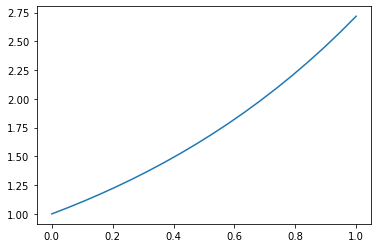

In [3]:
import matplotlib.pyplot as plt
x = np.linspace(0,1,20)
y = f(x)
plt.plot(x,y)
plt.show()

Even though the variation of this function is small, it may still seem strange that we use random numbers uniformly throughout the interval when the $x$ values in the second half of the interval dominate the integral.

Here is another example of 1-D Monte Carlo integration:

$$\int_0^1 \frac{dx}{1+x^2} = \frac{\pi}{4} = 0.785$$

For N = 1000 :  0.7852607929407203 ± 0.005069683704302612


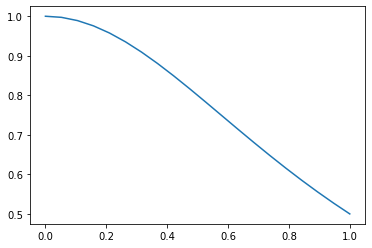

In [27]:
def f(x):
    return 1./(1+pow(x,2))

N = 1000
sum = 0.
sum2 = 0.
for i in range(N):
    x = random.random()
    sum += f(x)
    sum2 += pow(f(x),2)
result = sum/N
sigma = np.sqrt((sum2/N - pow(sum/N,2))/N)
print("For N =", N, ": ", result, "±", sigma)

x = np.linspace(0,1,20)
y = f(x)
plt.plot(x,y)
plt.show()

### Importance Sampling of Random Numbers in Integration

We saw that the uncertainty of the Monte Carlo integral is proportional to the variance of the integrand $f(x)$.
This is sometimes glossed over in the discussion of the convergence, but the variance of the integrand is just as important as the factor $1/N$.
If we had a way to reduce the variation in the integrand, we would be able to make the Monte Carlo integral converge more quickly.

Imagine multiplying and dividing the integrand by a carefully chosen normalized weight function $w(x)$:

$$\begin{align}
I &= \int_a^b f(x) dx \\
&= \int_a^b \frac{f(x)}{w(x)} \ w(x) \ dx \\
\end{align}
$$

If we make a change from variable from $x$ to $y$ so that

$$y(x) = \int_a^x w(t) \ dt$$

then we are using the *cumulative probability distribution* of $w(x)$.  (Remember that $\int_a^b w(x) dx = 1$.)

The integral $I$, under the change of variables, becomes

$$
I = \int_{y^{-1}(a)}^{y^{-1}(b)} \frac{f(x(y))}{w(x(y))} \ dy
= \frac{1}{N} \sum_{i=1}^N \frac{f}{w}
$$

If we choose a function $w(x)$ that has similar behavior to $f(x)$, then the integrand will be smooth , with a small variance.  Obviously this will reduce the uncertainty on the integral.

Here is another way to think of the substitution: 
instead of uniformly sampling $x$ to integrate $f(x)$, we uniformly sample $y$ and integrate $f(x)/w(x)$.
A uniform distribution of points in $y$ yields a distribution of point in $x$ distributed as $dy/dx = w(x)$.
That is, the integration points are concentrated in the regions of $x$ where $w(x)$ (and hopefully $f(x)$, by design) are large.

We are sampling the points that are most important to the sum approximating the integral.
For that reason, this kind of sampling is called *importance sampling*.

You may say that we are biasing the final sum toward points that have large $f$ values.  How can a simple $1/N$ adjustment compensate that?


### Example integrations with importance sampling

The challenge of importance sampling is finding a good $w(x)$ and writing the transform $x\rightarrow y$.

Consider our example
$$\int_0^1 \frac{dx}{1+x^2}$$

The integrand is monotonically decreasing , so we will look for a $w(x)$ that is roughly of the same order and decreases with $x$.
A good choice is 
$$w(x) = \frac{1}{3} (4-2x)$$
This has the benefit of already being normalized over the interval [0,1], it has near-unity values of 3/4 at both endpoints, and it is nearly flat everywhere in the interval.

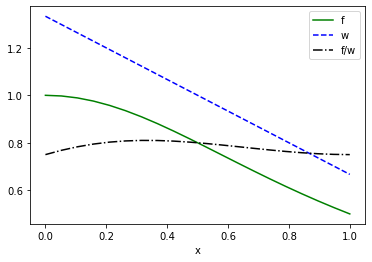

In [5]:
x = np.linspace(0,1,20)
f = 1./(1+pow(x,2))
w = 1./3. * (4-2*x)
fplot, = plt.plot(x, f, "g")
wplot, = plt.plot(x, w, "b--")
ratioplot, = plt.plot(x, f/w, "k-.")
plt.xlabel("x")
plt.legend([fplot, wplot, ratioplot], ['f', 'w', 'f/w'])
plt.show()

According to our recipe
$$\begin{align}
y(x) &= \int_0^x w(t)\ dt \\
&= \int_0^x \frac{1}{3} (4-2t) \ dt \\
&= \frac{1}{3} x (4-x)
\end{align}$$

The x-values for the function evaluation are now $x(y)$:

$$x = 2 - (4-3y)^{1/2}$$

and the limits of integration are $y^{-1}(a) = y^{-1}(0) = 0$ and $y^{-1}(b) = y^{-1}(1) = 1$.

(This is true by construction: can you see why?)

In [6]:
# Monte Carlo integration with importance sampling

def f(x):
    return 1./(1+pow(x,2))

def w(x):
    return (4. - 2.*x)/3.

def xx(y): 
    return 2. - np.sqrt(4 - 3*y)

N = 1000
sum = 0.
sum2 = 0.
for i in range(N):
    y = random.random()
    x = xx(y)
    integrand = f(x)/w(x)
    sum += integrand
    sum2 += pow(integrand,2)
result = sum/N
sigma = np.sqrt((sum2/N - pow(sum/N,2))/N)
print("For N=", N, ": ", result, "+/-", sigma)

For N= 1000 :  0.7840216263408172 +/- 0.0006375730943275779


It looks like the uncertainty has been reduced by almost a factor of 10 for $N=1000$.

The method of transforming the variable from $x$ to $y$ via the incomplete integral always works if $w(x)$ is known.
The problem is that $w(x)$ may be a complicated function that is too difficult to invert.

Is there another (simpler?) way to generate random points with a certain probability distribution $w(x)$?

**Yes!** The *von Neumann method (acceptance/rejection method)* can generate a sequence that follows $w(x)$.

Next, we will investigate two more ways to improve the importance sampling in MC integration:
* von Neumann algorithm (acceptance/rejection method)
* Metropolis algorithm (Markov chain method)

## Monte Carlo Integration

The general Monte Carlo integration rule was presented at the beginning of today's lecture:
$$\int_{a}^{b} \ dx \  f(x) \simeq
(b-a)\frac{1}{N} \sum_{i=1}^{N} f(x_{i}) = (b-a) \langle f
\rangle$$

The challenge is to determine a sequence of $x_i$ that helps the estimate converge to the true value of the integral as fast as possible (with minimal $N$).

$$\begin{align}
\sigma_I^2 &\simeq \frac{1}{N} \sigma_f^2 \\
&= \frac{1}{N} \left[ \frac{1}{N} \sum_{i=1}^N f_i^2 - \left( \frac{1}{N} \sum_{i=1}^N f_i \right)^2 \right]
\end{align}$$

In this course, we are focusing on the following methods for generating the $x_i$ sequence:
* uniform sampling throughout the interval
* importance sampling via integration of weighting function and analytic inversion of cumulative probability distribution
* importance sampling via von Neumann method (acceptance/rejection method)
* importance sampling via Metropolis algorithm (Markov chain random walk)

We have already covered the first two methods.

### Importance Sampling

Let us compare the $x_i$ used in uniform sampling and importance sampling.  We plot each point at ($x_i, f(x_i))$.

In the following examples, we are estimating the integral
$$\int_0^1 \frac{dx}{1+x^2}$$

For N= 20 :  0.8274942432012093 +/- 0.032576320824217214
For N= 20 :  0.7888238479220334 +/- 0.004197882227841968


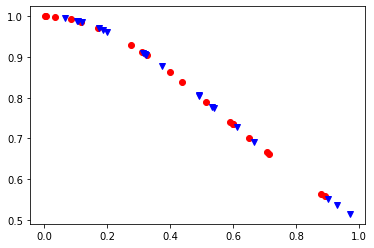

In [7]:
# Monte Carlo integration with uniform sampling and importance sampling
import numpy as np
import matplotlib.pyplot as plt
import random

# Interval of integration is [0,1] in x
def f(x):
    return 1./(1+pow(x,2))

def w(x):
    return (4. - 2.*x)/3.

def xx(y):
    return 2. - np.sqrt(4 - 3*y)

# Uniform sampling
N = 20
sum = 0.
sum2 = 0.
uniform_x_values = []
uniform_f_values = []
for i in range(N):
    x = random.random()
    sum += f(x)
    sum2 += pow(f(x),2)
    uniform_x_values.append(x)
    uniform_f_values.append(f(x))
result = sum/N
sigma = np.sqrt((sum2/N - pow(sum/N,2))/N)
print("For N=", N, ": ", result, "+/-", sigma)

# Importance sampling
sum = 0.
sum2 = 0.
importance_x_values = []
importance_f_values = []
for i in range(N):
    y = random.random()
    x = xx(y)
    integrand = f(x)/w(x)
    sum += integrand
    sum2 += pow(integrand,2)
    importance_x_values.append(x)
    importance_f_values.append(f(x))
result = sum/N
sigma = np.sqrt((sum2/N - pow(sum/N,2))/N)
print("For N=", N, ": ", result, "+/-", sigma)

plt.plot(uniform_x_values, uniform_f_values, 'ro')
plt.plot(importance_x_values, importance_f_values, 'bv')
plt.show()

The blue triangles from the importance sampling tend to be in the region where the weighting function values are large.  There are two things to note about both:
* There is no order to the random numbers.  A point is not necessarily followed by another point nearby.
* There is no correlation between the numbers in the sequence.  This is crucial to our formula for the uncertainty estimate.

*Question*: How can we get the same estimate for the integral, approximated by the sum of function values, when the "random" sequence is biased toward the high function values?  
*Answer*: The answer is that the integrand in importance sampling is not $f(x)$ or even $f(x(y))$.
Instead it is $f(x)/w(x)$, and $w(x)$ also happens to be large where $f(x)$ is large.  The sequence bias toward large values of $w(x)$ is compensated by the $1/w(x)$ in the integrand.